In [1]:
# import the necessary libraries

import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
# Define system parameters
m = 1000          # Mass (kg)
xi = 0.05         # Damping ratio
f = 1.5           # Frequency of excitation (Hz)
wn = 2 * math.pi * f # angular natural frequency
wd = wn * math.sqrt(1 - xi**2)  # Damped natural frequency

In [3]:
# Time parameters
tMax = 20          # Maximum time (s)
delT = 0.01        # Time step (s)
time = np.arange(0, tMax + delT, delT)  # Time vector

# Define excitation force
f_force = 1       # Frequency of the force (Hz)
wf = 2 * math.pi * f_force
P = 100            # Force amplitude (N)
force = P * np.sin(wf * time)  # Force vector

In [4]:
# Define the Duhamel integration function
def Duhamel(T, F):
    # Initialize an array to store displacement values
    U = np.zeros(len(T))
    
    # Initialize variables for cumulative sums used to calculate A and B
    ACum_i = 0
    BCum_i = 0
    
    # Loop through the time vector to compute the response at each time point
    for i, t in enumerate(T):
        
        if i > 0:
            # Calculate A[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.cos(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.cos(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            ACum_i += Area_i  # Cumulative areas from t=0 to the current time
            A_i = (1 / (m * wd)) * ACum_i  # Value of A for the current time-step
            
            # Calculate B[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.sin(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.sin(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            BCum_i += Area_i  # Cumulative areas from t=0 to the current time
            B_i = (1 / (m * wd)) * BCum_i  # Value of B for the current time-step
            
            # Calculate the response
            U[i] = A_i * math.e**(-xi * wn * T[i]) * math.sin(wd * T[i]) - B_i * math.e**(-xi * wn * T[i]) * math.cos(wd * T[i])
            
    return U


In [5]:
# Compute the system response using Duhamel integration
response = Duhamel(T=time, F=force)

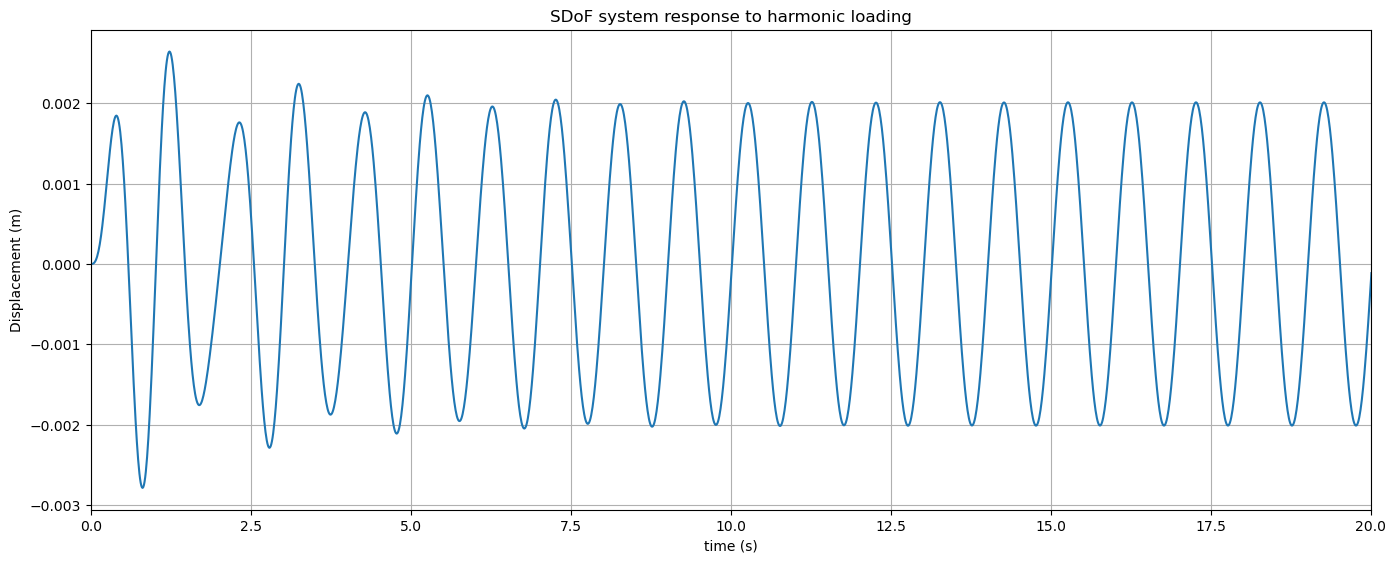

In [6]:

# Create a plot to visualize the system response
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])
axes.plot(time, response)

# Configure plot labels and title
axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('SDoF system response to harmonic loading')
axes.set_xlim([0, tMax])

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()

## VALIDATING THE NUMERICAL SOLUTION

In [7]:
#steady state response
beta = wf/wd
k = m*wd**2
#Break equation into two for convenience
O = (P/k)*(1/((1-beta**2)**2 + (2*xi*beta)**2))
response_cf = O * ((1-beta**2)*np.sin(wf*time) - 2*xi*beta*np.cos(wf*time))

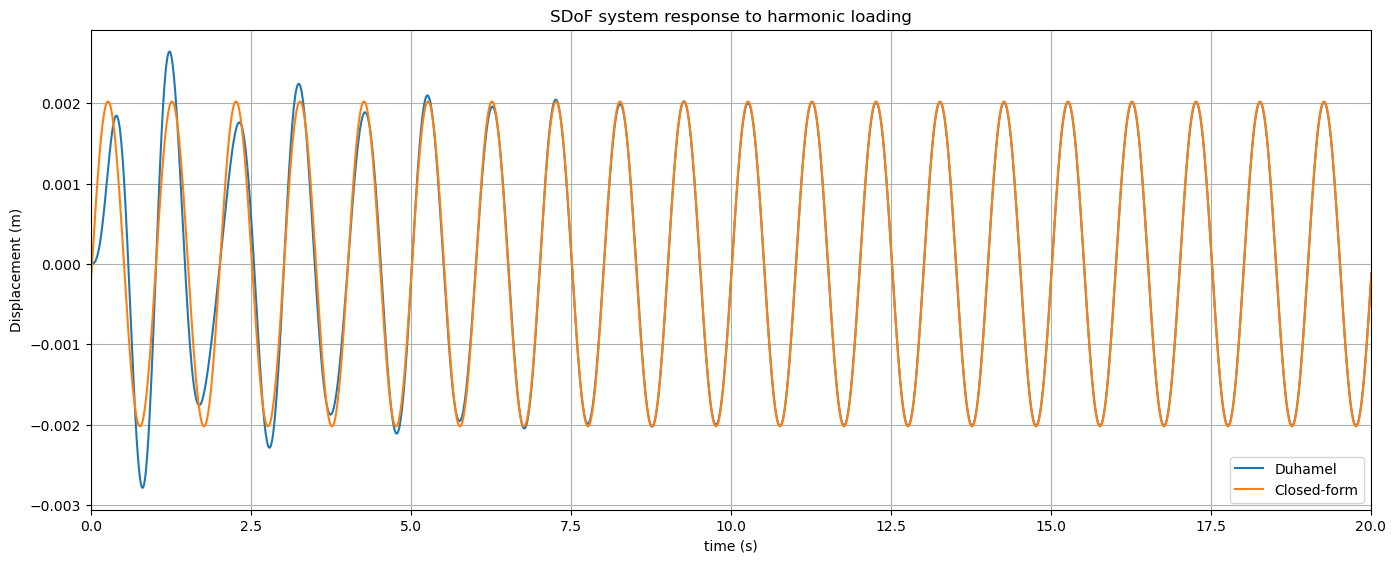

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])
axes.plot(time, response, label='Duhamel')
axes.plot(time, response_cf, label='Closed-form')

axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('SDoF system response to harmonic loading')
axes.legend(loc='lower right')
axes.set_xlim(0, tMax)
plt.grid()
plt.show()